## How to use this notebook
Any Jupyter Notebook (JN) is made of "text" (Markdown) and "code" cells. Code cells must be executed to see the result of the program. To run a cell, select it and press Shift + Enter. Pressing Shift + Enter multiple times will execute consecutive blocks of code one after another, while skipping text cells (executing them does nothing). It is important to run the code cells in the order they appear in the notebook.

A complete version of this JN is available by request to instructors using the book "Exploring mathematics wth CAS assistance" for teaching. This version has blank or partially blank code lines that are supposed to be completed by the user before running the code.

Code cells contain (nonexecutable) comments preceded by the pound sign. The comments are of two types:
- a short comment placed on a code line typically states what the result of implementation of the encoded operation
- a comment placed on a separate line states either the result of the next block of code lines or provides some details only for the next line where a more involved operation is encoded

The code is written by Lydia Novozhilova. Senan Hayes contributed to writing text cells and proofreading, editing, and fruitful discussion of this document.


# Lab 2: Euler line
## Problem formulation
Given three vertices of a rectangle, write a function that returns a figure with plots of the triangle, its three centers (centroid, orthocenter, and circumcenter), and the Euler line.

For more details regarding the centers and the Euler line read Section 2.4. For information on the lab refer to Section 3.1.



## Brief description of the notebook contents
Help function **find3centers** finds the centroid, orthocenter, and circumcenter of a triangle defined by its vertices. Use of very intuitive sympy functions makes these computations very transparent.

Comments included into the help function **my_polygon** explain the actions of the operators in it.

The main function **my_euler** calls help functions **find3centers** and **my_polygon** when needed. To keep the codes as elementary as possible, some conventional operations, like verification of conditions on input data, as well as some aesthetic arguments for plot functions are not included.

In [ ]:
# Help function: Three centers of a triangle
from sympy import *
import matplotlib.pyplot as plt

def find3centers(pts):
  """
  Args:
    pts: list of vertices coordinates (each element is a list of length 2)
  Output:
    Coordinates of the centroid, orthocenter, and circumcenter (list of lists)
  """
  # Conversion of pts into sympy Point objects
  # encode converion of the third point
  p1,p2,p3 = Point(pts[0][0],pts[0][1]),Point(pts[1][0],pts[1][1]),?
  L =[Line(p1,p2),Line(p1,p3)] # two sides of triangle as sympy Line objects

  # Find centroid
  # encode second midpoint
  m = [p1.midpoint(p2),?] # midpoints of two sides
  # encode second median
  C = [Line(p3,m[0]),?] # two medians as sympy Line objects
  # sympy Point object f; f[0] is list of the Point coordinates
  f=intersection(C[0], C[1])
  # floating-point approximation of centroid coordinates rounded to two digits
  centroid = [f[0][0].evalf(2),f[0][1].evalf(2)]

  # Find orthocenter
  # two heights
  H = [L[0].perpendicular_line(p3),?] # encode second height
  h = intersection(H[0],?) # insert name of the second height
  # floating-point approximation of orthocenter coordinates
  orthocenter = [h[0][0].evalf(2),?] # encode approximation of second coordinate

  # Find circumcenter
  # two perpendicular bisectors
  Q = [L[0].perpendicular_line(m[0]),?] # encode second bisector
  q = intersection(Q[0],?) # insert name of the second bisector
  circumcenter = [q[0][0].evalf(2),?] # encode approximation of second coordinate
  print('centroid:',centroid,'orthocenter:',orthocenter,'circumcenter:',circumcenter)
  return list([centroid, orthocenter, circumcenter])


In [ ]:
# Example
find3centers([[0,0],[4,7],[6,4]])

centroid: [3.3, 3.7] orthocenter: [6.0, 4.0] circumcenter: [2.0, 3.5]


[[3.3, 3.7], [6.0, 4.0], [2.0, 3.5]]

In [ ]:
# Help function: Plot polygon
def my_polygon(pts,c):
  """
  Args:
    pts: list of vertices coordinates
  c: line color (string)
  Output:
    polygon plot
  """
  # appending the first point to pts (this trick closes polygon)
  pts.append(pts[0])
  # separate x and y values (this is needed for the plot function)
  x,y =[[p[0] for p in pts],[p[1] for ?]] # complete encoding of list of y's
  # plotting the polygon
  plt.plot(x,y, color=c)

In [ ]:
# Main function: Creates the required figure
def my_euler(verts,ttl,fig_size):
  """
  Args:
    verts:    list of vertices coordinates
    ttl:      title (string)
    fig_size: figsize (tuple (m,n) of numbers)
  Output:
    Figure with triangle, its three centers, and the Euler line
  """
  fig = plt.figure(figsize = fig_size)
  plt.title(ttl)

  centers = find3centers(?) # encode argument of this function

  my_polygon(centers,'green') # Euler line plot

  # separating of x- and y-coordinates (needed for plotting centers)
  x,y =[[p[0] for p in centers],[?]] # encode list of y's
  plt.scatter(x, y,color='red') # centers plot
  my_polygon(verts,'blue')# triangle plot
  plt.show()


centroid: [3.3, 3.7] orthocenter: [6.0, 4.0] circumcenter: [2.0, 3.5]


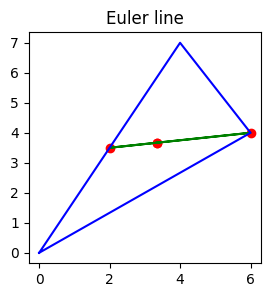

In [ ]:
# Example
my_euler([[0,0],[4,7],[6,4]],'Euler line',(3,3))